In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
input_signals_db = f'/home/gomes/synthetic-data/csc-signals-{batchSize}.json'
input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'

In [3]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [12]:
with open(path_to_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

SPARSITY = 5
id0 = next(x['id'] for x in signals_results if x['sparsity'] == SPARSITY and x['snr'] == 10)


In [13]:
signal_id = id0
signal_dict = workbench.signalDictFromId(signal_id)

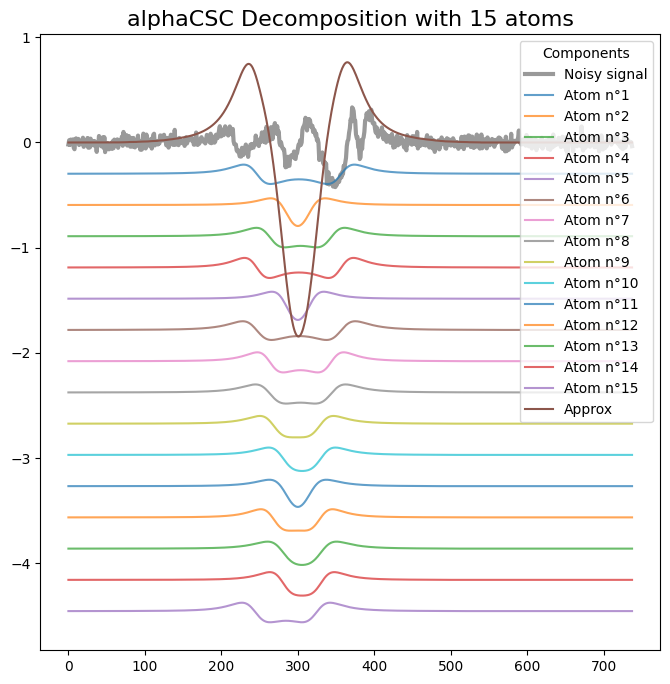

In [14]:
workbench.plotAlphaCSCDecomposition(signal_dict, sparsity=SPARSITY+10)

In [15]:
true_atoms = signal_dict['atoms']
print(true_atoms)

[{'x': 99, 'b': 0.01, 'y': 0.024, 's': 5.593441125723278e-05}, {'x': 76, 'b': 0.045, 'y': 0.014, 's': 2.0690700982160427e-05}, {'x': 135, 'b': 0.005, 'y': 0.01, 's': 1.3516616682807639e-05}, {'x': 15, 'b': 0.045, 'y': 0.016, 's': 2.513773322455907e-05}, {'x': 98, 'b': 0.025, 'y': 0.022, 's': 3.699399476170953e-05}]


In [16]:
l1_approx_atoms = dictionary.alphaCSCResultFromDict(signal_dict, nb_activations=SPARSITY+10)
print(l1_approx_atoms)


[{'x': 55, 'b': 0.055, 'y': 0.03, 's': 6.2248555025221e-05}, {'x': 54, 'b': 0.015, 'y': 0.03, 's': 7.023405592700929e-05}, {'x': 57, 'b': 0.04, 'y': 0.03, 's': 5.980153670398562e-05}, {'x': 55, 'b': 0.055, 'y': 0.028000000000000004, 's': 5.657125199123347e-05}, {'x': 54, 'b': 0.015, 'y': 0.028000000000000004, 's': 6.116551004747656e-05}, {'x': 55, 'b': 0.055, 'y': 0.032, 's': 6.803651101706044e-05}, {'x': 57, 'b': 0.04, 'y': 0.028000000000000004, 's': 5.4376248343667526e-05}, {'x': 57, 'b': 0.04, 'y': 0.032, 's': 6.542006643411837e-05}, {'x': 52, 'b': 0.030000000000000002, 'y': 0.03, 's': 5.864653776370022e-05}, {'x': 59, 'b': 0.025, 'y': 0.03, 's': 5.929821168884043e-05}, {'x': 54, 'b': 0.015, 'y': 0.032, 's': 8.017195812015283e-05}, {'x': 52, 'b': 0.030000000000000002, 'y': 0.028000000000000004, 's': 5.2952707156110745e-05}, {'x': 59, 'b': 0.025, 'y': 0.032, 's': 6.596752580999086e-05}, {'x': 59, 'b': 0.025, 'y': 0.028000000000000004, 's': 5.309936930423166e-05}, {'x': 38, 'b': 0.04,

In [17]:
workbench.computeMaxTruePositives(true_atoms, l1_approx_atoms, pos_err_threshold=10, corr_err_threshold=0.7)

0